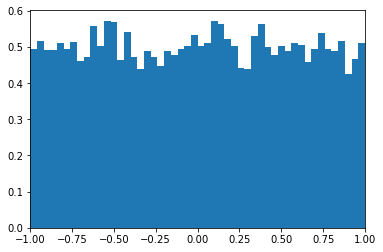

In [88]:
import numpy as np
import matplotlib.pyplot as plt 

# initial conditions

np.random.seed(1)
init_users = 10**4
user = np.zeros(init_users)

opinion_sigma = 0.20

# creating the wanted opinion distribution

for i in range(0, init_users):
    #opinion = np.random.normal(0, opinion_sigma)
    opinion = np.random.uniform(low=-1.0, high=1.0)
    user[i] = opinion 

thres = 0.5 # threshold for opinion difference for user to reinforce or reject opinion
mu_1 = 0.1 # opinion reinforcement paramter
mu_2 = 0.01 # opinion rejection paramter
border = 2
reset = 1

total = 0 # counting for total iterations

# plot of initial opinion distribution

plt.figure()
plt.hist(user, bins=50, density='true')
plt.xlim([-1,1])
plt.show()

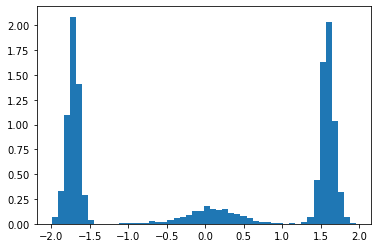

Total iteration steps: 1e+06


In [100]:
# opinion dynamics model: each user can interact with each other (you can choose if both users changes opinion or only one)

simulation_time = 10**5

for i in range(0, simulation_time):
    a = np.random.randint(0,init_users)
    b = np.random.randint(0,init_users)
    total += 1
    
    if (a == b) or (user[a] == user[b]):
        continue
    
    op_diff = abs(user[a] - user[b])
    a_old = user[a]
    
    if op_diff < thres:
        user[a] += mu_1 * (user[b] - user[a])
        #user[b] += mu_1 * (a_old - user[b])
    else: 
        user[a] -= mu_2 * (user[b] - user[a])
        #user[b] -= mu_2 * (a_old - user[b])
        
    if user[a] > border:
        user[a] = reset
                
    if user[a] < -border:
        user[a] = -reset  
        
    if user[b] > border:
        user[b] = reset
                
    if user[b] < -border:
        user[b] = -reset     
        
    
plt.figure()
plt.hist(user, bins=50, density='true')
#plt.xlim([-1,1])
plt.show()  
print("Total iteration steps: %1.g" %total)